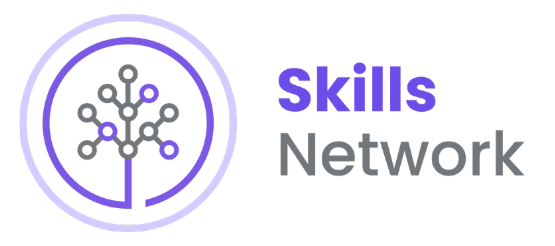

# **Note**: The assignment for the Honours on the Chicago Data Set should be done through **IBM Db2 Cloud Console**. Then the screenshots of some of the queries should be submitted for the assignment.

I did the excerices on *IBM Db2 Cloud* and I have put the queries in this notebook for the convenience.

#**Final Project:**

##Advanced SQL Techniques


Objectives
After completing this lab, you will be able to:
1. Use joins to query data from multiple tables
2. Create and query views
3. Write and run stored procedures
4. Use transactions

Scenario
In this project, you will work with three datasets that are available on the City of Chicago’s Data Portal:
- Socioeconomic indicators in Chicago
- Chicago public schools
- Chicago crime data

You must download each dataset, create a table for each one, and load the appropiate dataset through the Db2 console. If you have already completed the Hands on Lab: Joins, you can reuse the tables you created for that hands-on lab. However, you should not reuse similar tables with other names from other exercises or labs, as they may not create the correct results.

**Important note:**
If you have not yet downloaded the three datasets from the City of Chicago’s Data Portal, created the required tables, and loaded the data, please follow the instructions in this section.


# City of Chicago Datasets

1. Socioeconomic indicators in Chicago

This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for
each Chicago community area, for the years 2008 – 2012. A detailed description of this dataset and the original dataset can
be obtained from the Chicago Data Portal at:
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

2. Chicago public schools

This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school
year. A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at:
https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

3. Chicago crime data

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that
occurred in the City of Chicago from 2001 to present, minus the most recent seven days. A detailed description of this
dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/PublicSafety/Crimes-2001-to-present/ijzp-q8t2

#Store the datasets in database tables

The lab requires you to have these three tables populated with a subset of the whole datasets.

Download the
‘ChicagoCensusData.csv’, ‘ChicagoPublicSchools.csv’, and ‘ChicagoCrimeData.csv’ datasets below and load the data into your Db2 On Cloud database.

- Chicago Census Data

- Chicago Public Schools

= Chicago Crime Data

You need to create a new table for each dataset. As you load each dataset, click on “(+) New Table”, specify the name of
the table you want to create, and then click “Next”.


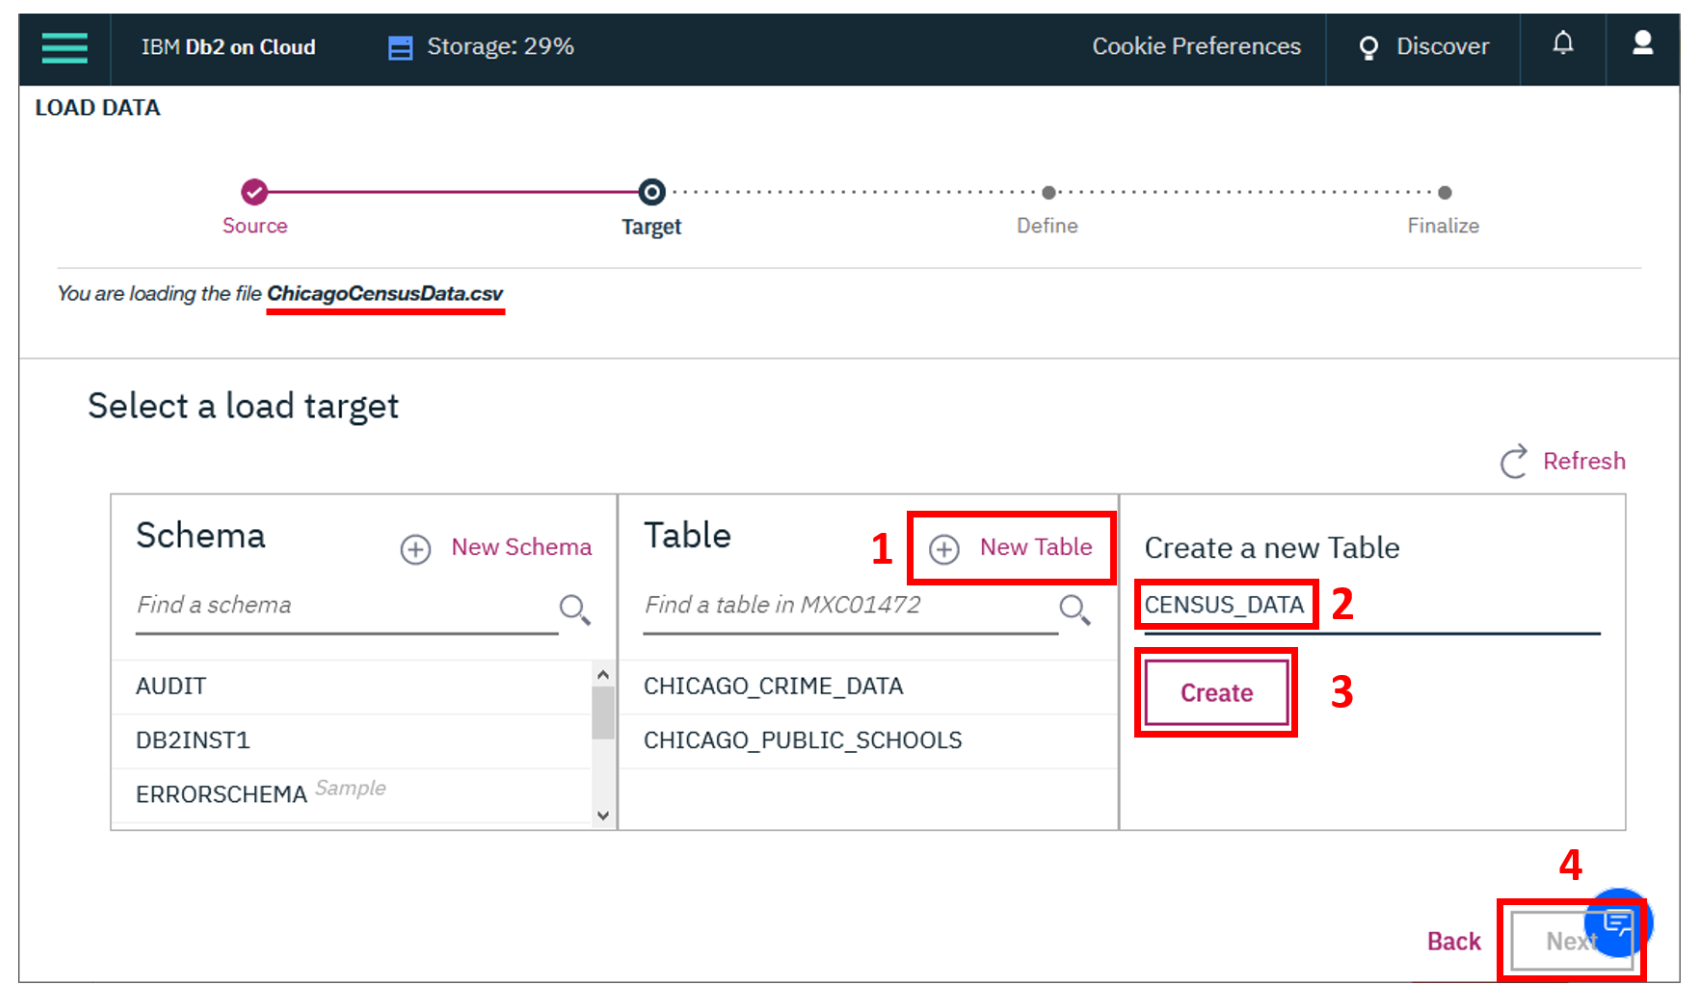

Name the new tables as follows:

1. **CENSUS_DATA**
2. **CHICAGO_PUBLIC_SCHOOLS**
3. **CHICAGO_CRIME_DATA**

After you have created the tables, review the data in each table by using the View Data feature in the Db2 On Cloud console.


#**Exercise 1: Using Joins**

You have been asked to produce some reports about the communities and crimes in the Chicago area. You will need to use
SQL join queries to access the data stored across multiple tables.

**Question 1**:
- Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.  

**Take a screenshot showing the last SQL query and its results.**

In [ ]:
# Excercise 1.1 solution:

SELECT CPS.NAME_OF_SCHOOL, CD.COMMUNITY_AREA_NAME, CPS.AVERAGE_STUDENT_ATTENDANCE
FROM CHICAGO_PUBLIC_SCHOOLS CPS
JOIN CENSUS_DATA CD
ON CPS.COMMUNITY_AREA_NUMBER = CD.COMMUNITY_AREA_NUMBER
WHERE CD.HARDSHIP_INDEX = 98;

**Screenshot 1.1:** The screenshot below is from IBM Db2 Cloud Console:

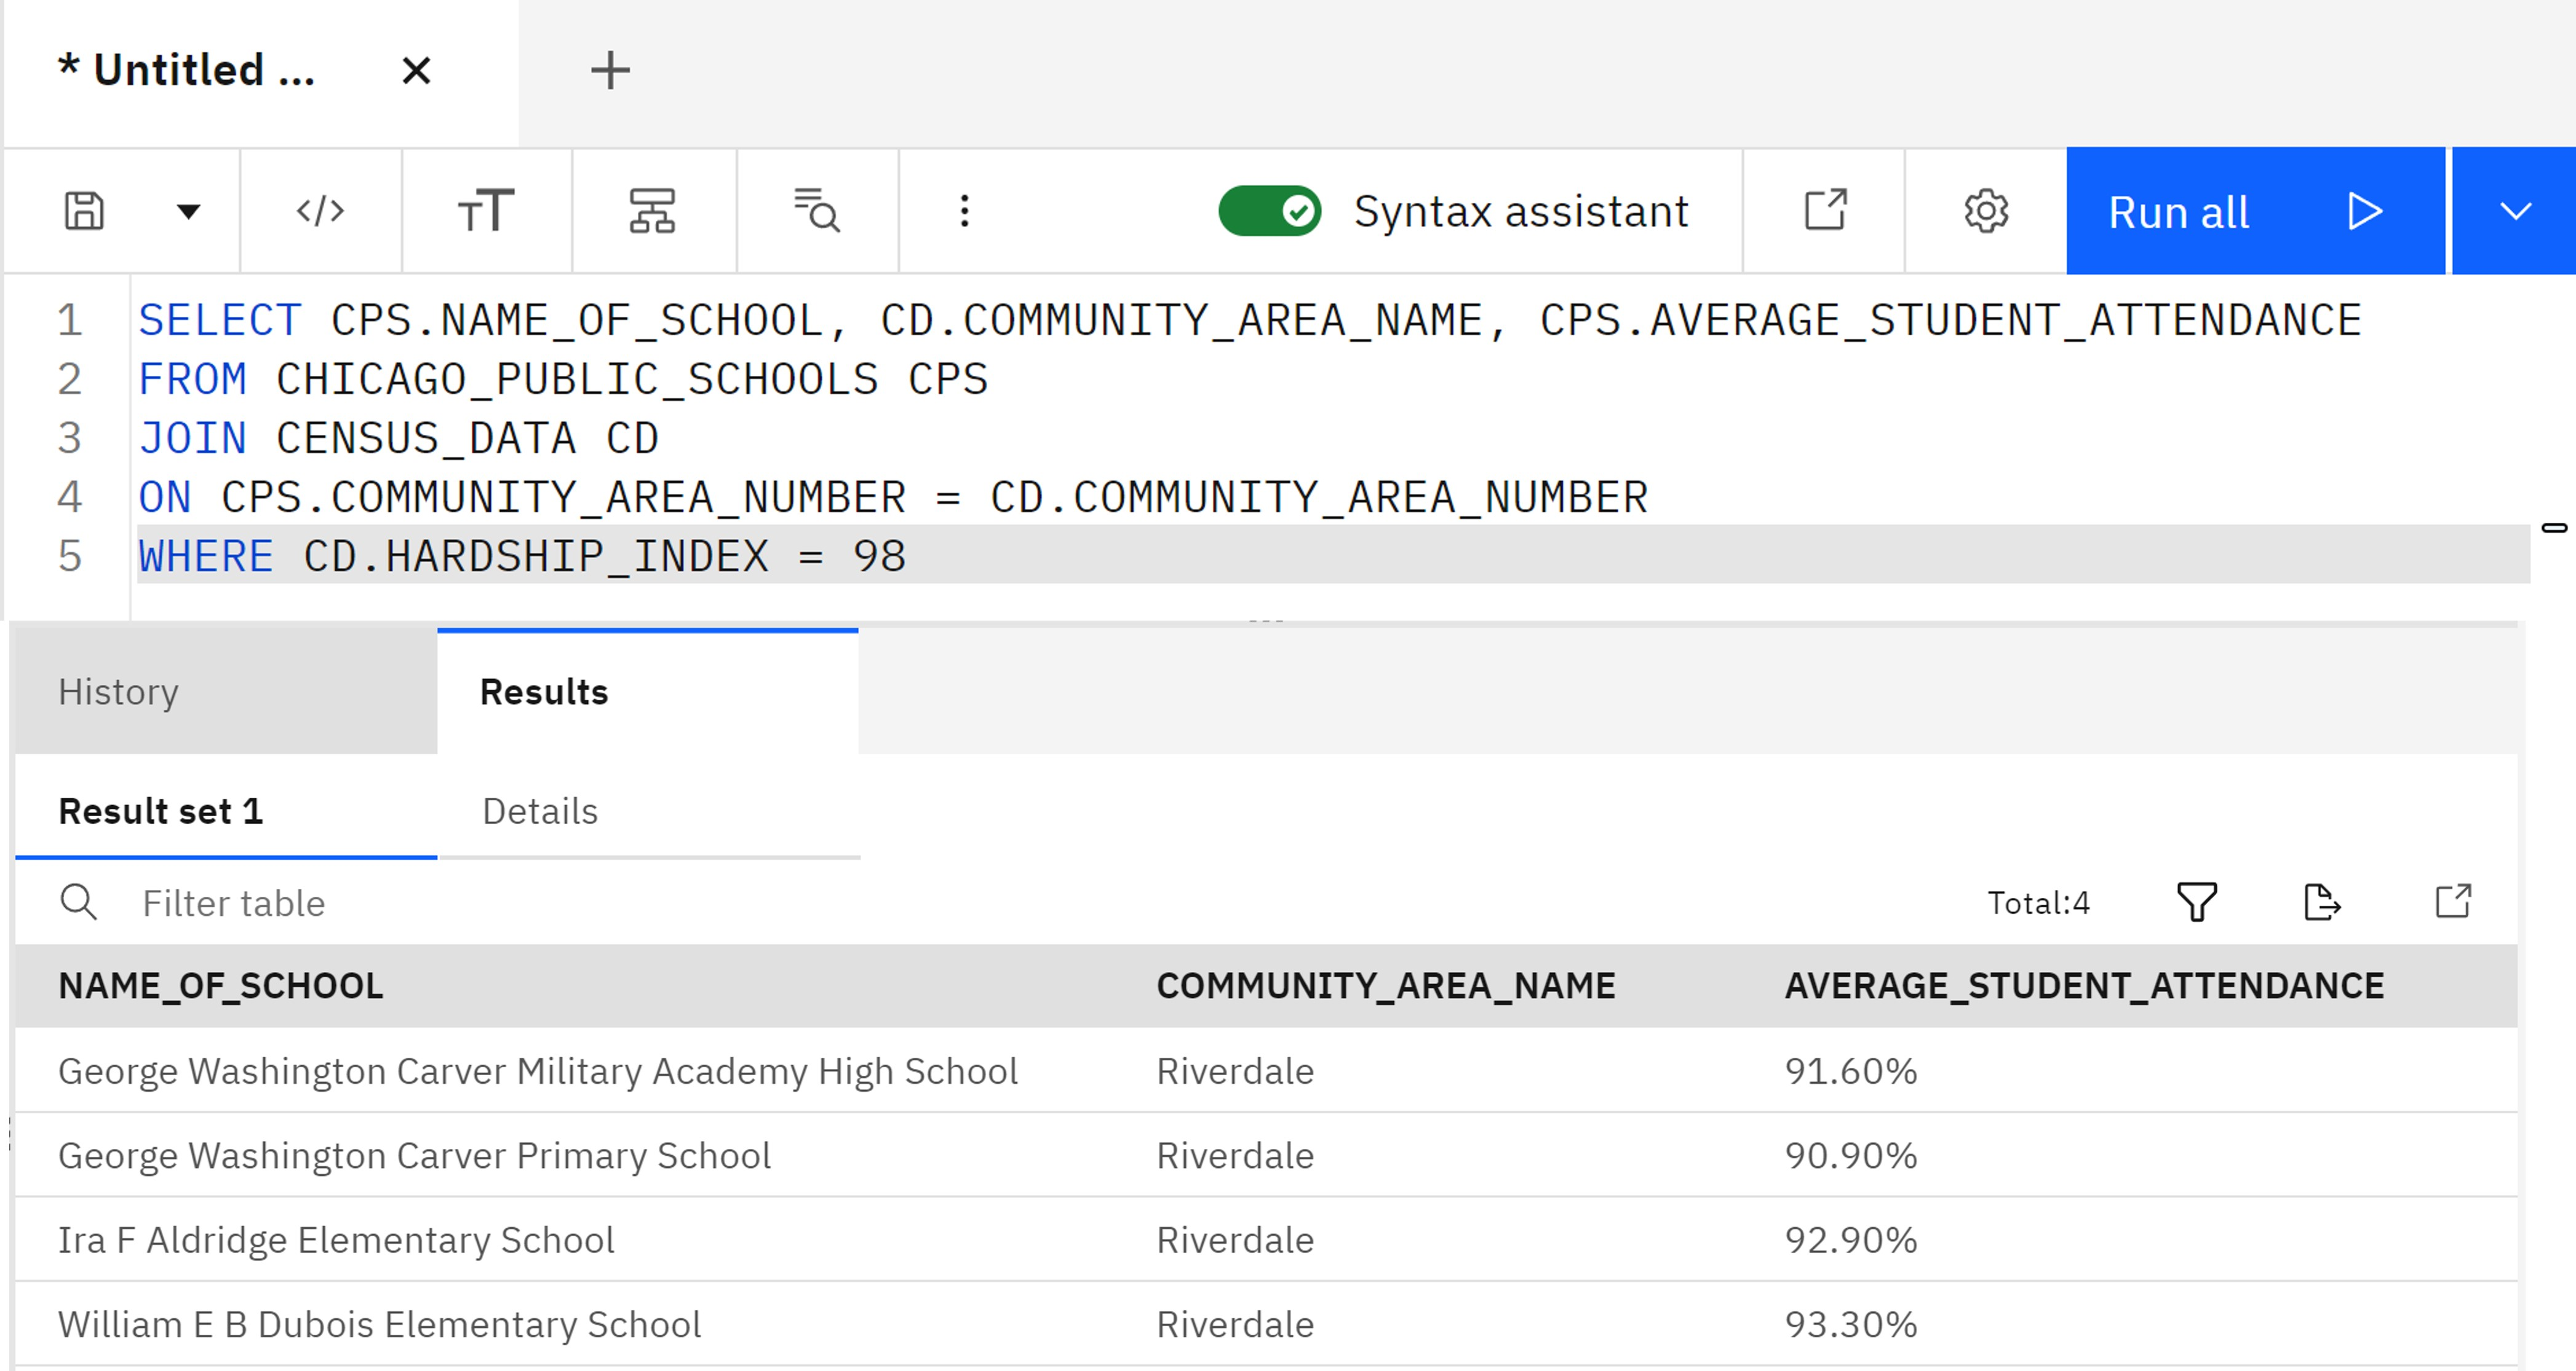

**Question 2:**
- Write and execute a SQL query to list all crimes that took place at a school. Include case number, crime type and community name.

**Take a screenshot showing the last SQL query and its results.**

In [ ]:
# Excercise 1.2 solution:

SELECT CCD.CASE_NUMBER, CCD.PRIMARY_TYPE, CD.COMMUNITY_AREA_NAME, CCD.LOCATION_DESCRIPTION
FROM CHICAGO_CRIME_DATA CCD
LEFT JOIN CENSUS_DATA CD ON CCD.COMMUNITY_AREA_NUMBER = CD.COMMUNITY_AREA_NUMBER
WHERE CCD.LOCATION_DESCRIPTION LIKE '%SCHOOL%';

**Screenshot 1.2:** The screenshot below is from IBM Db2 Cloud Console:

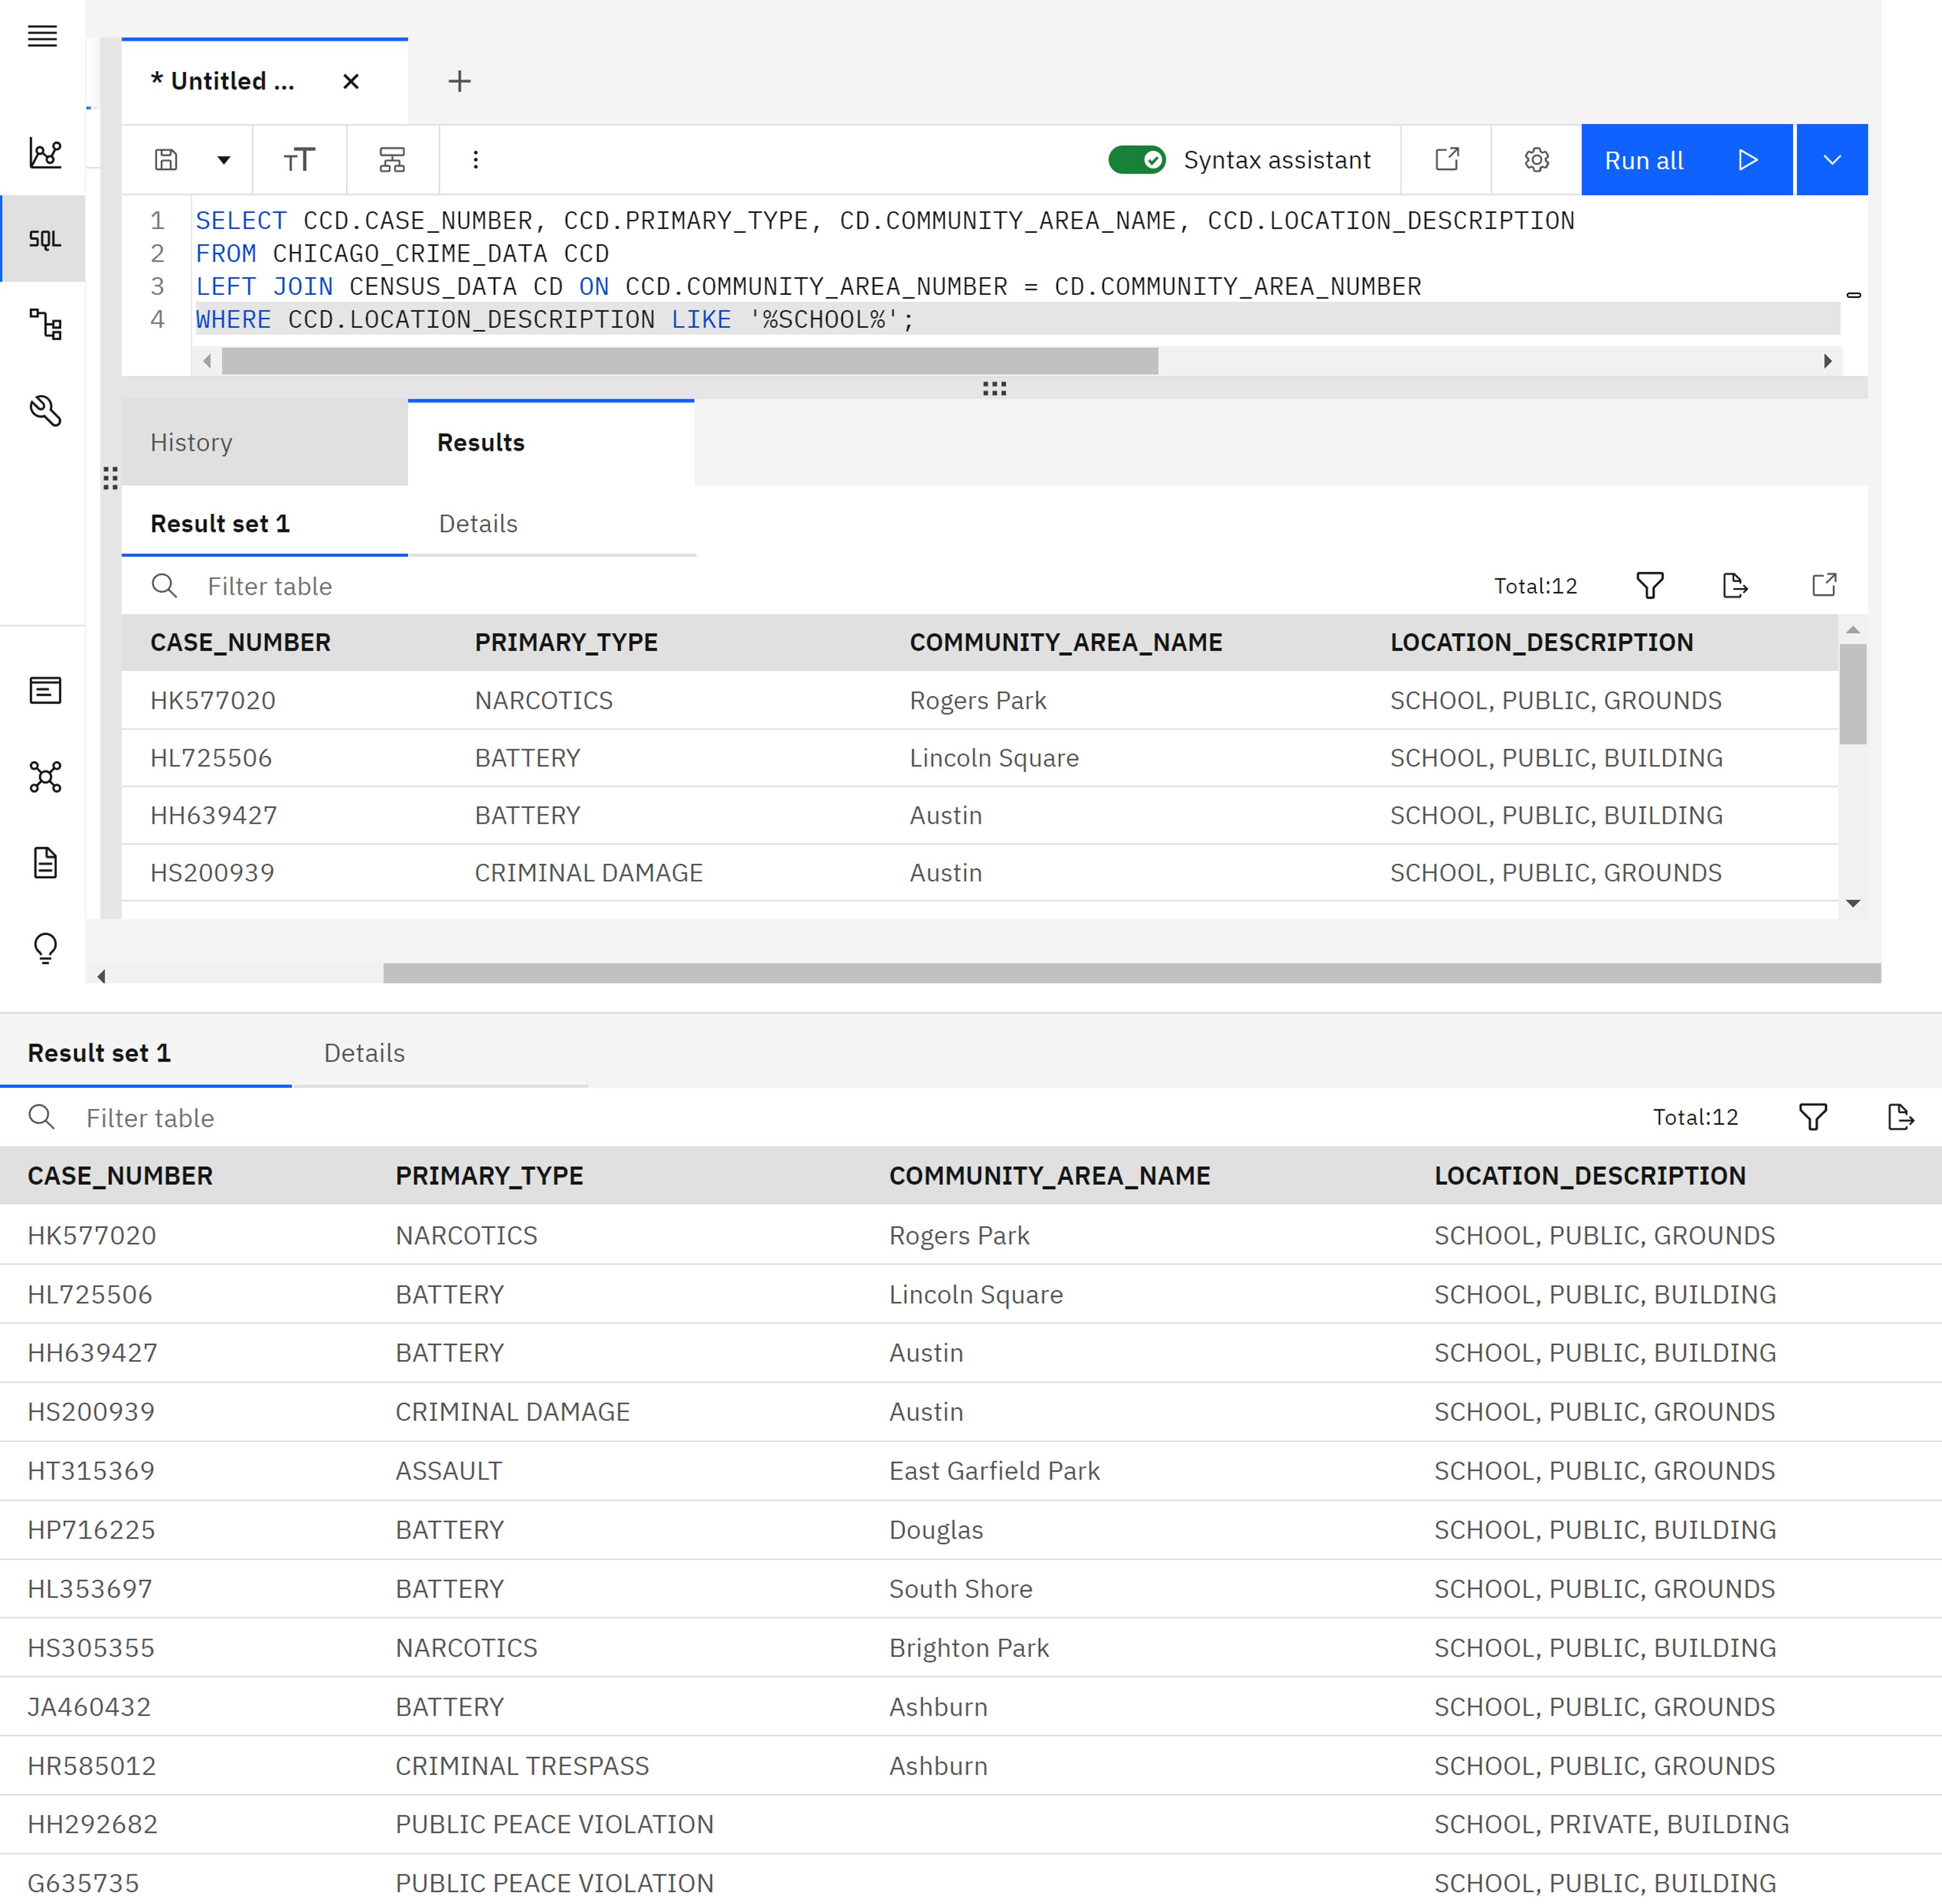

#**Exercise 2: Creating a View**

For privacy reasons, you have been asked to create a view that enables users to select just the school name and the icon fields from the CHICAGO_PUBLIC_SCHOOLS table. By providing a view, you can ensure that users cannot see the actual scores given to a school, just the icon associated with their score. You should define new names for the view columns to obscure the use of scores and icons in the original table.

**Question 1:**
- Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column.

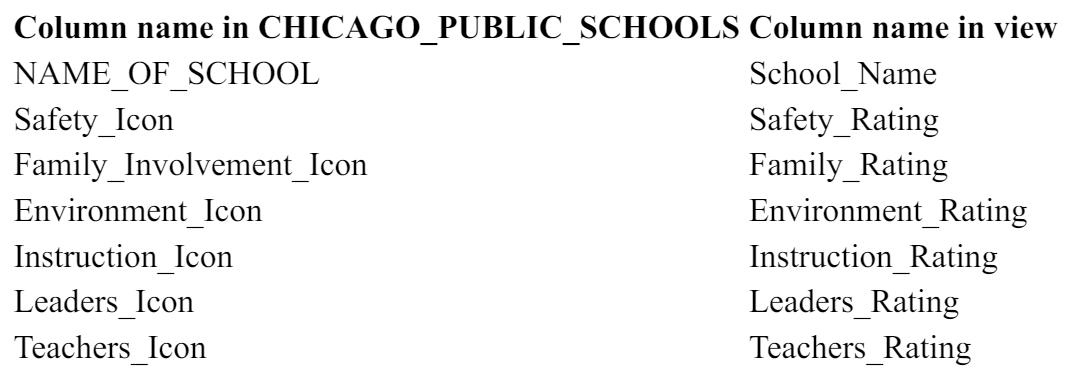

- Write and execute a SQL statement that returns all of the columns from the view.

- Write and execute a SQL statement that returns just the school name and leaders rating from the view.

**Take a screenshot showing the last SQL query and its results.**

In [ ]:
# Excercise 2.1 solution:

CREATE VIEW School_Data AS
SELECT
    NAME_OF_SCHOOL AS School_Name,
    Safety_Icon AS Safety_Rating,
    Family_Involvement_Icon AS Family_Rating,
    Environment_Icon AS Environment_Rating,
    Instruction_Icon AS Instruction_Rating,
    Leaders_Icon AS Leaders_Rating,
    Teachers_Icon AS Teachers_Rating
FROM CHICAGO_PUBLIC_SCHOOLS;
#Query all columns from the view:
SELECT * FROM School_Data;
#Query just the school name and leaders rating from the view:
SELECT School_Name, Leaders_Rating FROM School_Data;


**Screenshot 2.1:** The screenshot below is from IBM Db2 Cloud Console:

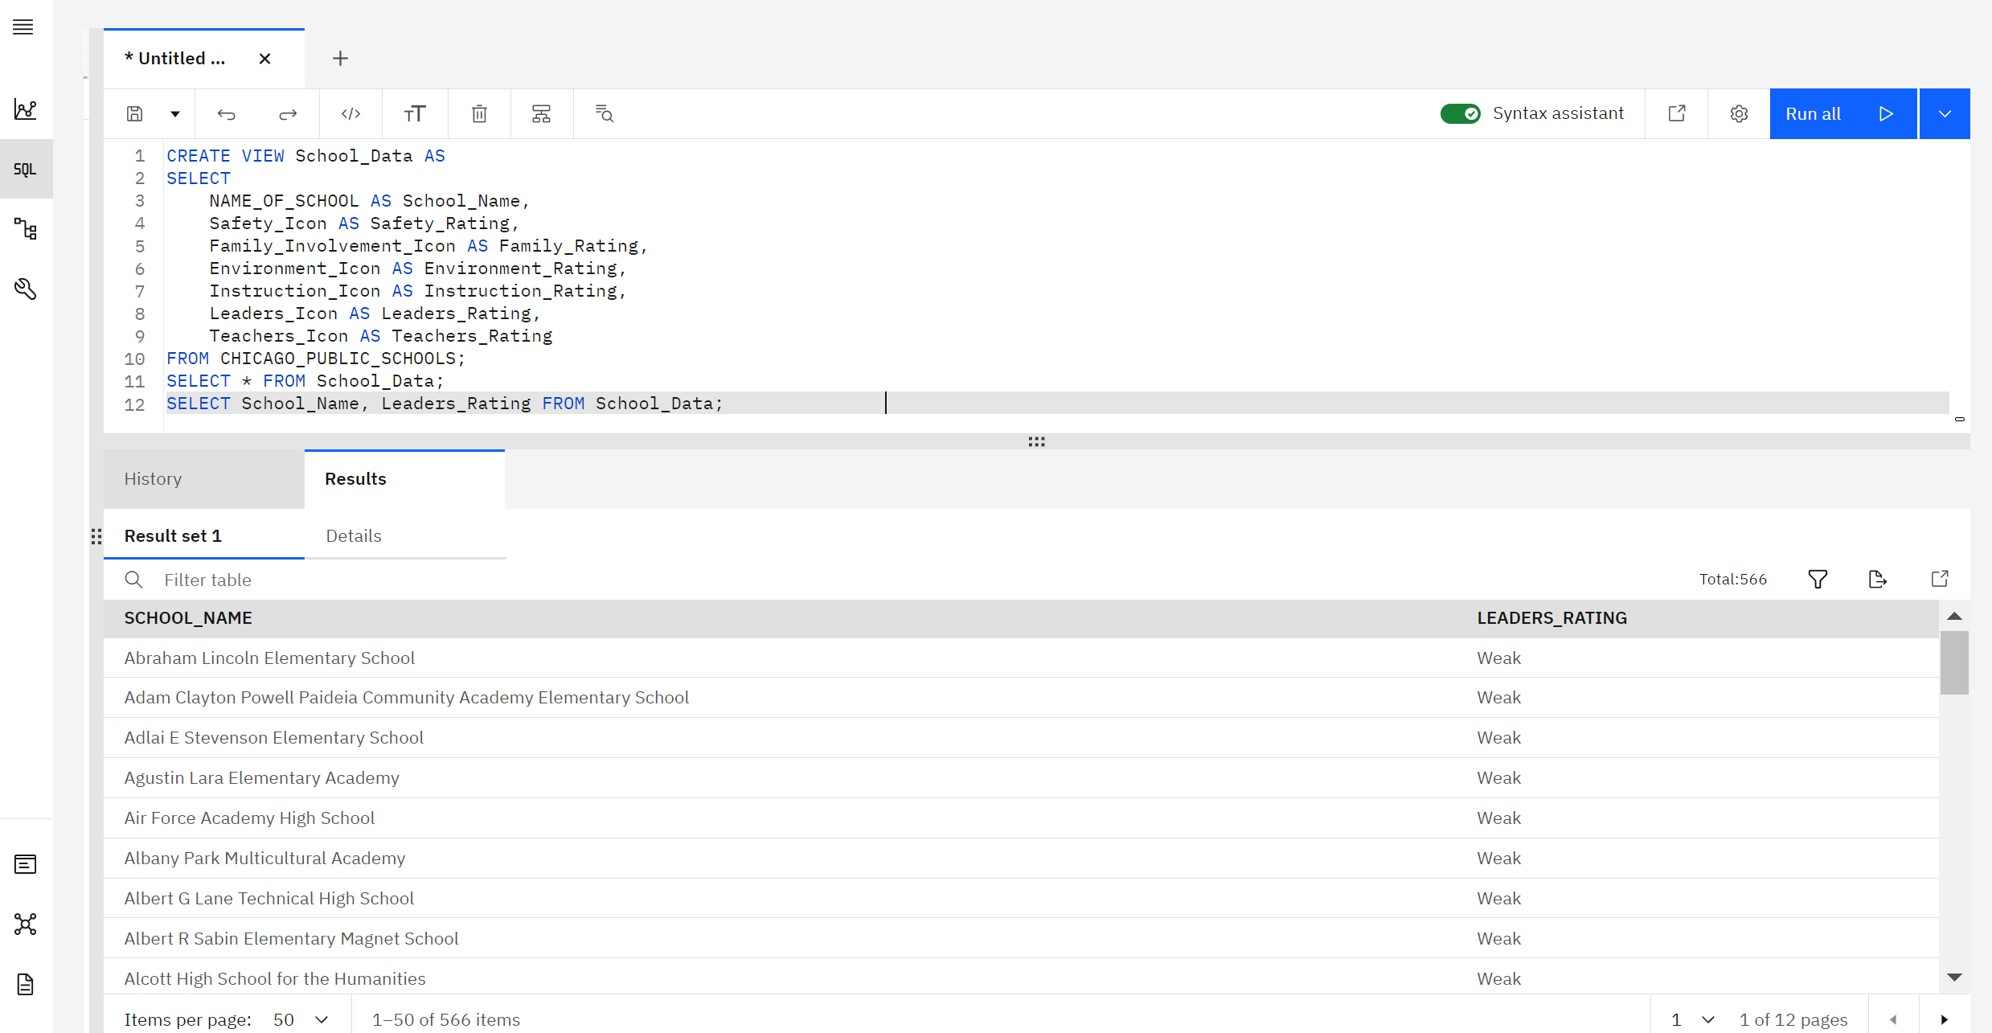

#**Exercise 3: Creating a Stored Procedure**

The icon fields are calculated based on the value in the corresponding score field. You need to make sure that when a score
field is updated, the icon field is updated too. To do this, you will write a stored procedure that receives the school id and a
leaders score as input parameters, calculates the icon setting and updates the fields appropriately.



**Question 1:**
- Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_Leader_Score parameter as an integer. Don’t forget to use the #SET
TERMINATOR statement to use the @ for the CREATE statement terminator.

**Take a screenshot showing the SQL query.**


In [ ]:
# IMPORTANT:
# As you see in some of the questions below we have used this command: CREATE PROCEDURE or CREATE OR REPLACE PROCEDURE
# If you do not want to use CREATE OR REPLACE PROCEDURE, you should first use DROP PROCEDURE to drop the procedure you created in the preceding questions. i.e. Use the code below everytime

--#SET TERMINATOR @
DROP PROCEDURE UPDATE_LEADERS_SCORE;
@

In [ ]:
# Excercise 3.1 solution:

--#SET TERMINATOR @
CREATE PROCEDURE UPDATE_LEADERS_SCORE
LANGUAGE SQL
READS SQL DATA
DYNAMIC RESULT SETS 1
BEGIN
    DECLARE C1 CURSOR WITH RETURN FOR
    SELECT SCHOOL_ID, LEADERS_SCORE FROM CHICAGO_PUBLIC_SCHOOLS;
    OPEN C1;
END
@

**Screenshot 3.1:** The screenshot below is from IBM Db2 Cloud Console:

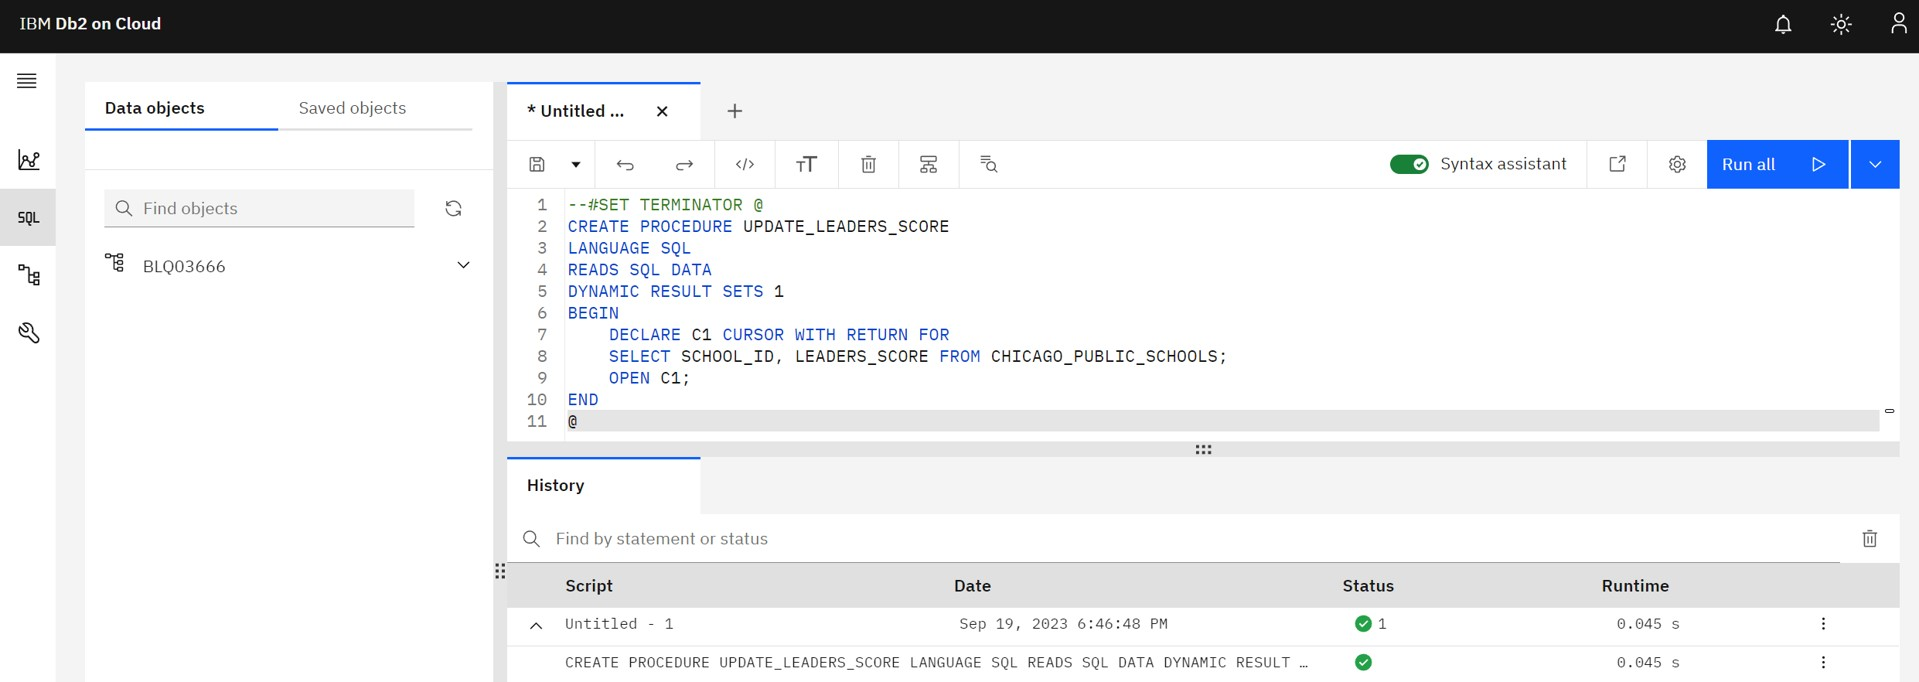

**Question 2:**
- Inside your stored procedure, write a SQL statement to update the Leaders_Score field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID to the value in the in_Leader_Score parameter.

**Take a screenshot showing the SQL query.**

In [ ]:
# Excercise 3.2 solution:

--#SET TERMINATOR @
CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE(IN in_SCHOOL_ID INTEGER, IN in_LEADERS_SCORE INTEGER)
LANGUAGE SQL
MODIFIES SQL DATA

BEGIN

	UPDATE CHICAGO_PUBLIC_SCHOOLS
	SET LEADERS_SCORE = in_LEADERS_SCORE
	WHERE SCHOOL_ID = in_SCHOOL_ID;
END
@

**Screenshot 3.2:** The screenshot below is from IBM Db2 Cloud Console:

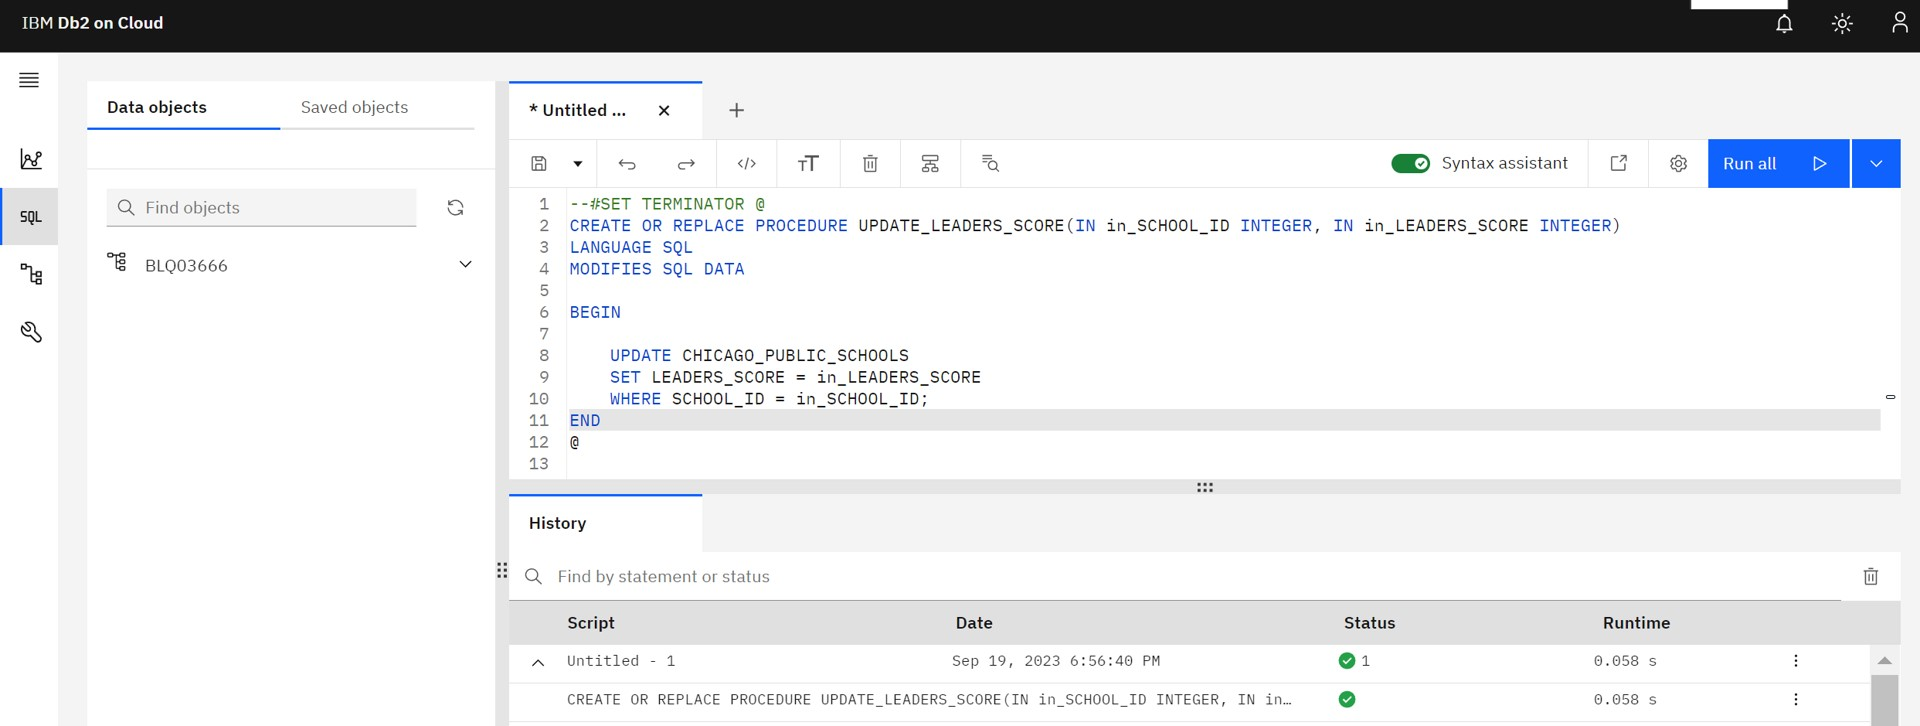

**Question 3:**
- Inside your stored procedure, write a SQL IF statement to update the Leaders_Icon field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID using the following information

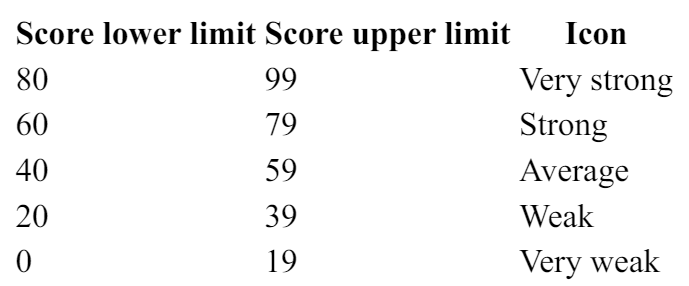

In [ ]:
# Excercise 3.3 solution:

--#SET TERMINATOR @
CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE(IN in_SCHOOL_ID INTEGER, IN in_LEADERS_SCORE INTEGER)
LANGUAGE SQL
MODIFIES SQL DATA
BEGIN
    UPDATE CHICAGO_PUBLIC_SCHOOLS
    SET LEADERS_SCORE = in_LEADERS_SCORE
    WHERE SCHOOL_ID = in_SCHOOL_ID;

    IF in_LEADERS_SCORE > 0 AND in_LEADERS_SCORE < 20 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Very_weak';

    ELSEIF in_LEADERS_SCORE < 40 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Weak';

    ELSEIF in_LEADERS_SCORE < 60 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Average';

    ELSEIF in_LEADERS_SCORE < 80 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Strong';

    ELSEIF in_LEADERS_SCORE < 100 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Very_strong';

    END IF;
END
@

**Screenshot 3.3:** The screenshot below is from IBM Db2 Cloud Console:

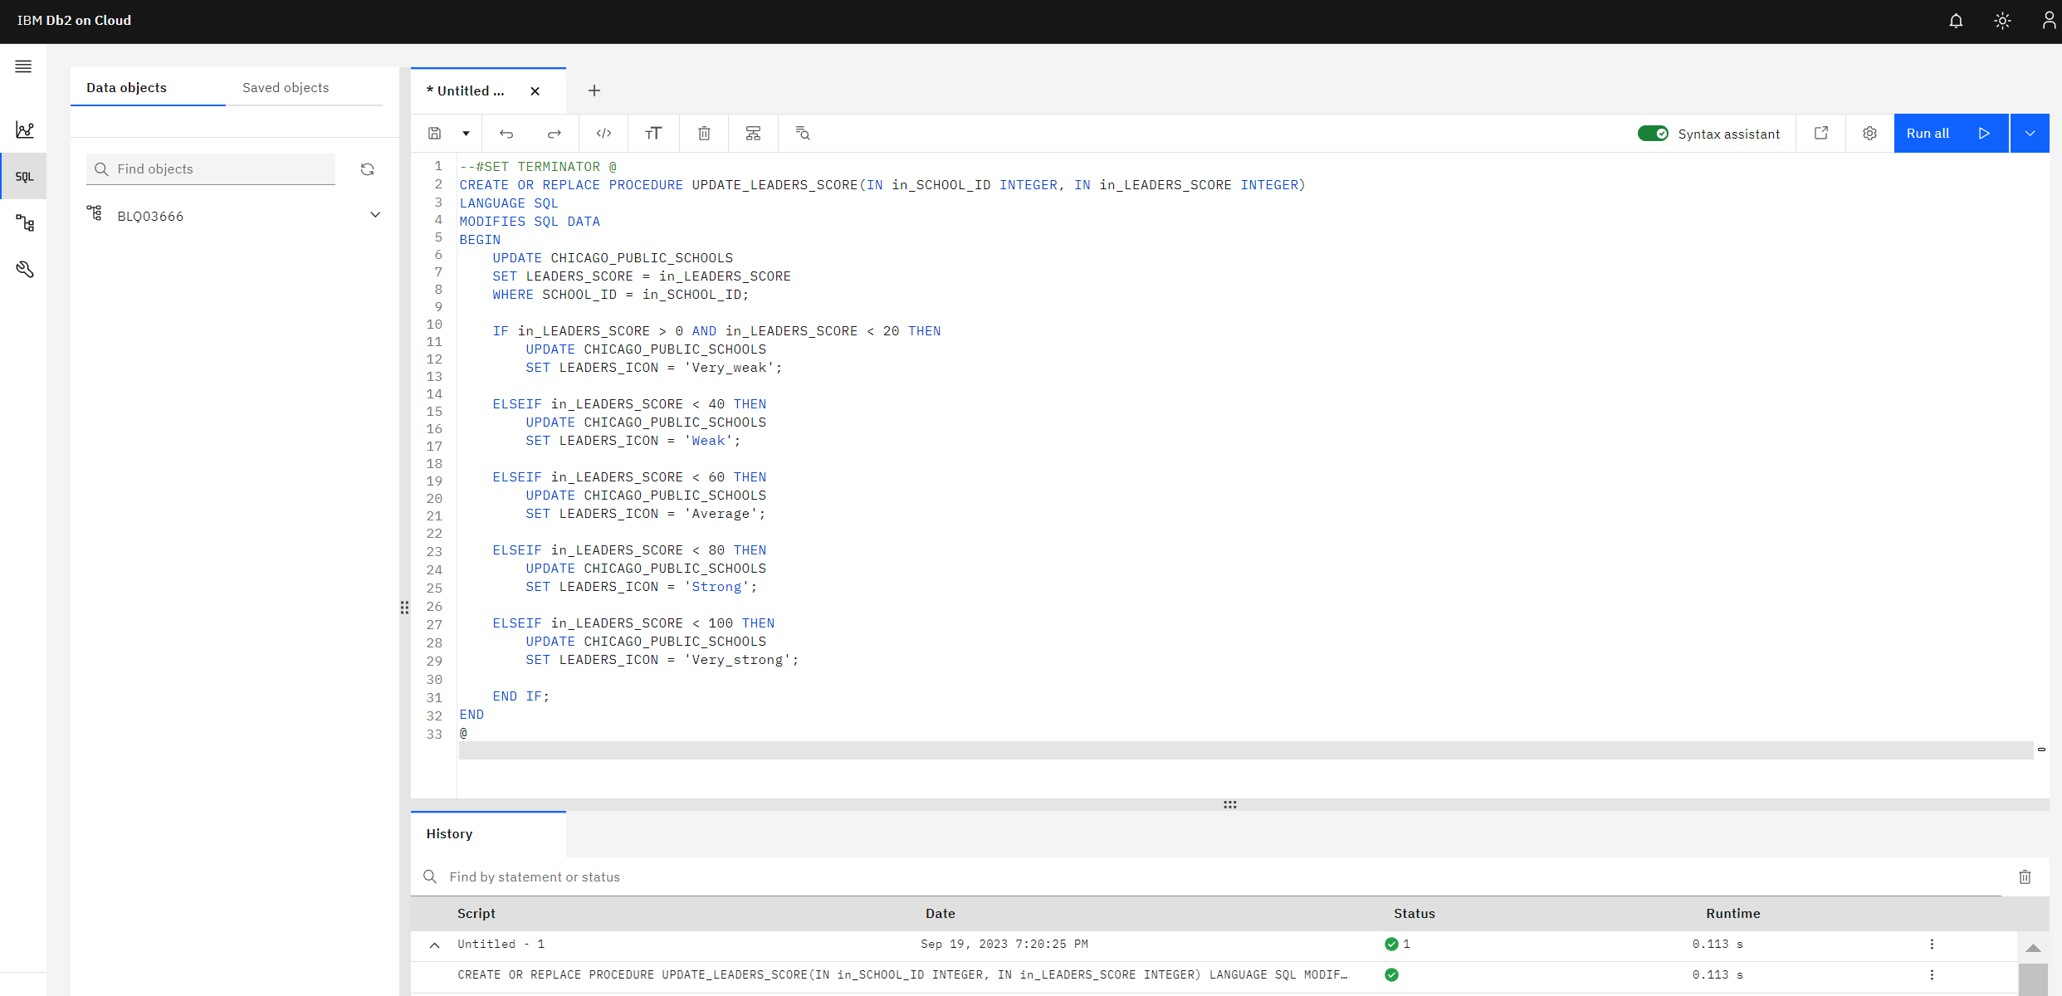

**Question 4:**

- Run your code to create the stored procedure.

**Take a screenshot showing the SQL query and its results**

- Write a query to call the stored procedure, passing a valid school ID and a leader score of 50, to check that the procedure works as expected.


In [ ]:
# Excercise 3.4 solution:

# I used SCHOOL_ID = 610185 as it's correponding LEADERS_SCORE was 50
CALL UPDATE_LEADERS_SCORE(610185, 50)

In [ ]:
# Then I used the query below to check if with LEADERS_SCORE = 50 (between 40 to 59) will give me the LEADERS_ICON of 'Average"
SELECT LEADERS_ICON FROM CHICAGO_PUBLIC_SCHOOLS WHERE SCHOOL_ID = 610185 AND LEADERS_SCORE = 50; # I got the results "Average"!  Yay!!

In [ ]:
# IMPORTANT: Note that after running the code above I first got an error of Value "Average" is too long.. SQLCODE=-433, SQLSTATE=22001, DRIVER=4.32.28
# So, to fix the issue I ran the query below first:

--#SET TERMINATOR @
ALTER TABLE CHICAGO_PUBLIC_SCHOOLS
ALTER COLUMN LEADERS_ICON SET DATA TYPE VARCHAR(11);
@

**Screenshot 3.4:** The screenshot below is from IBM Db2 Cloud Console:

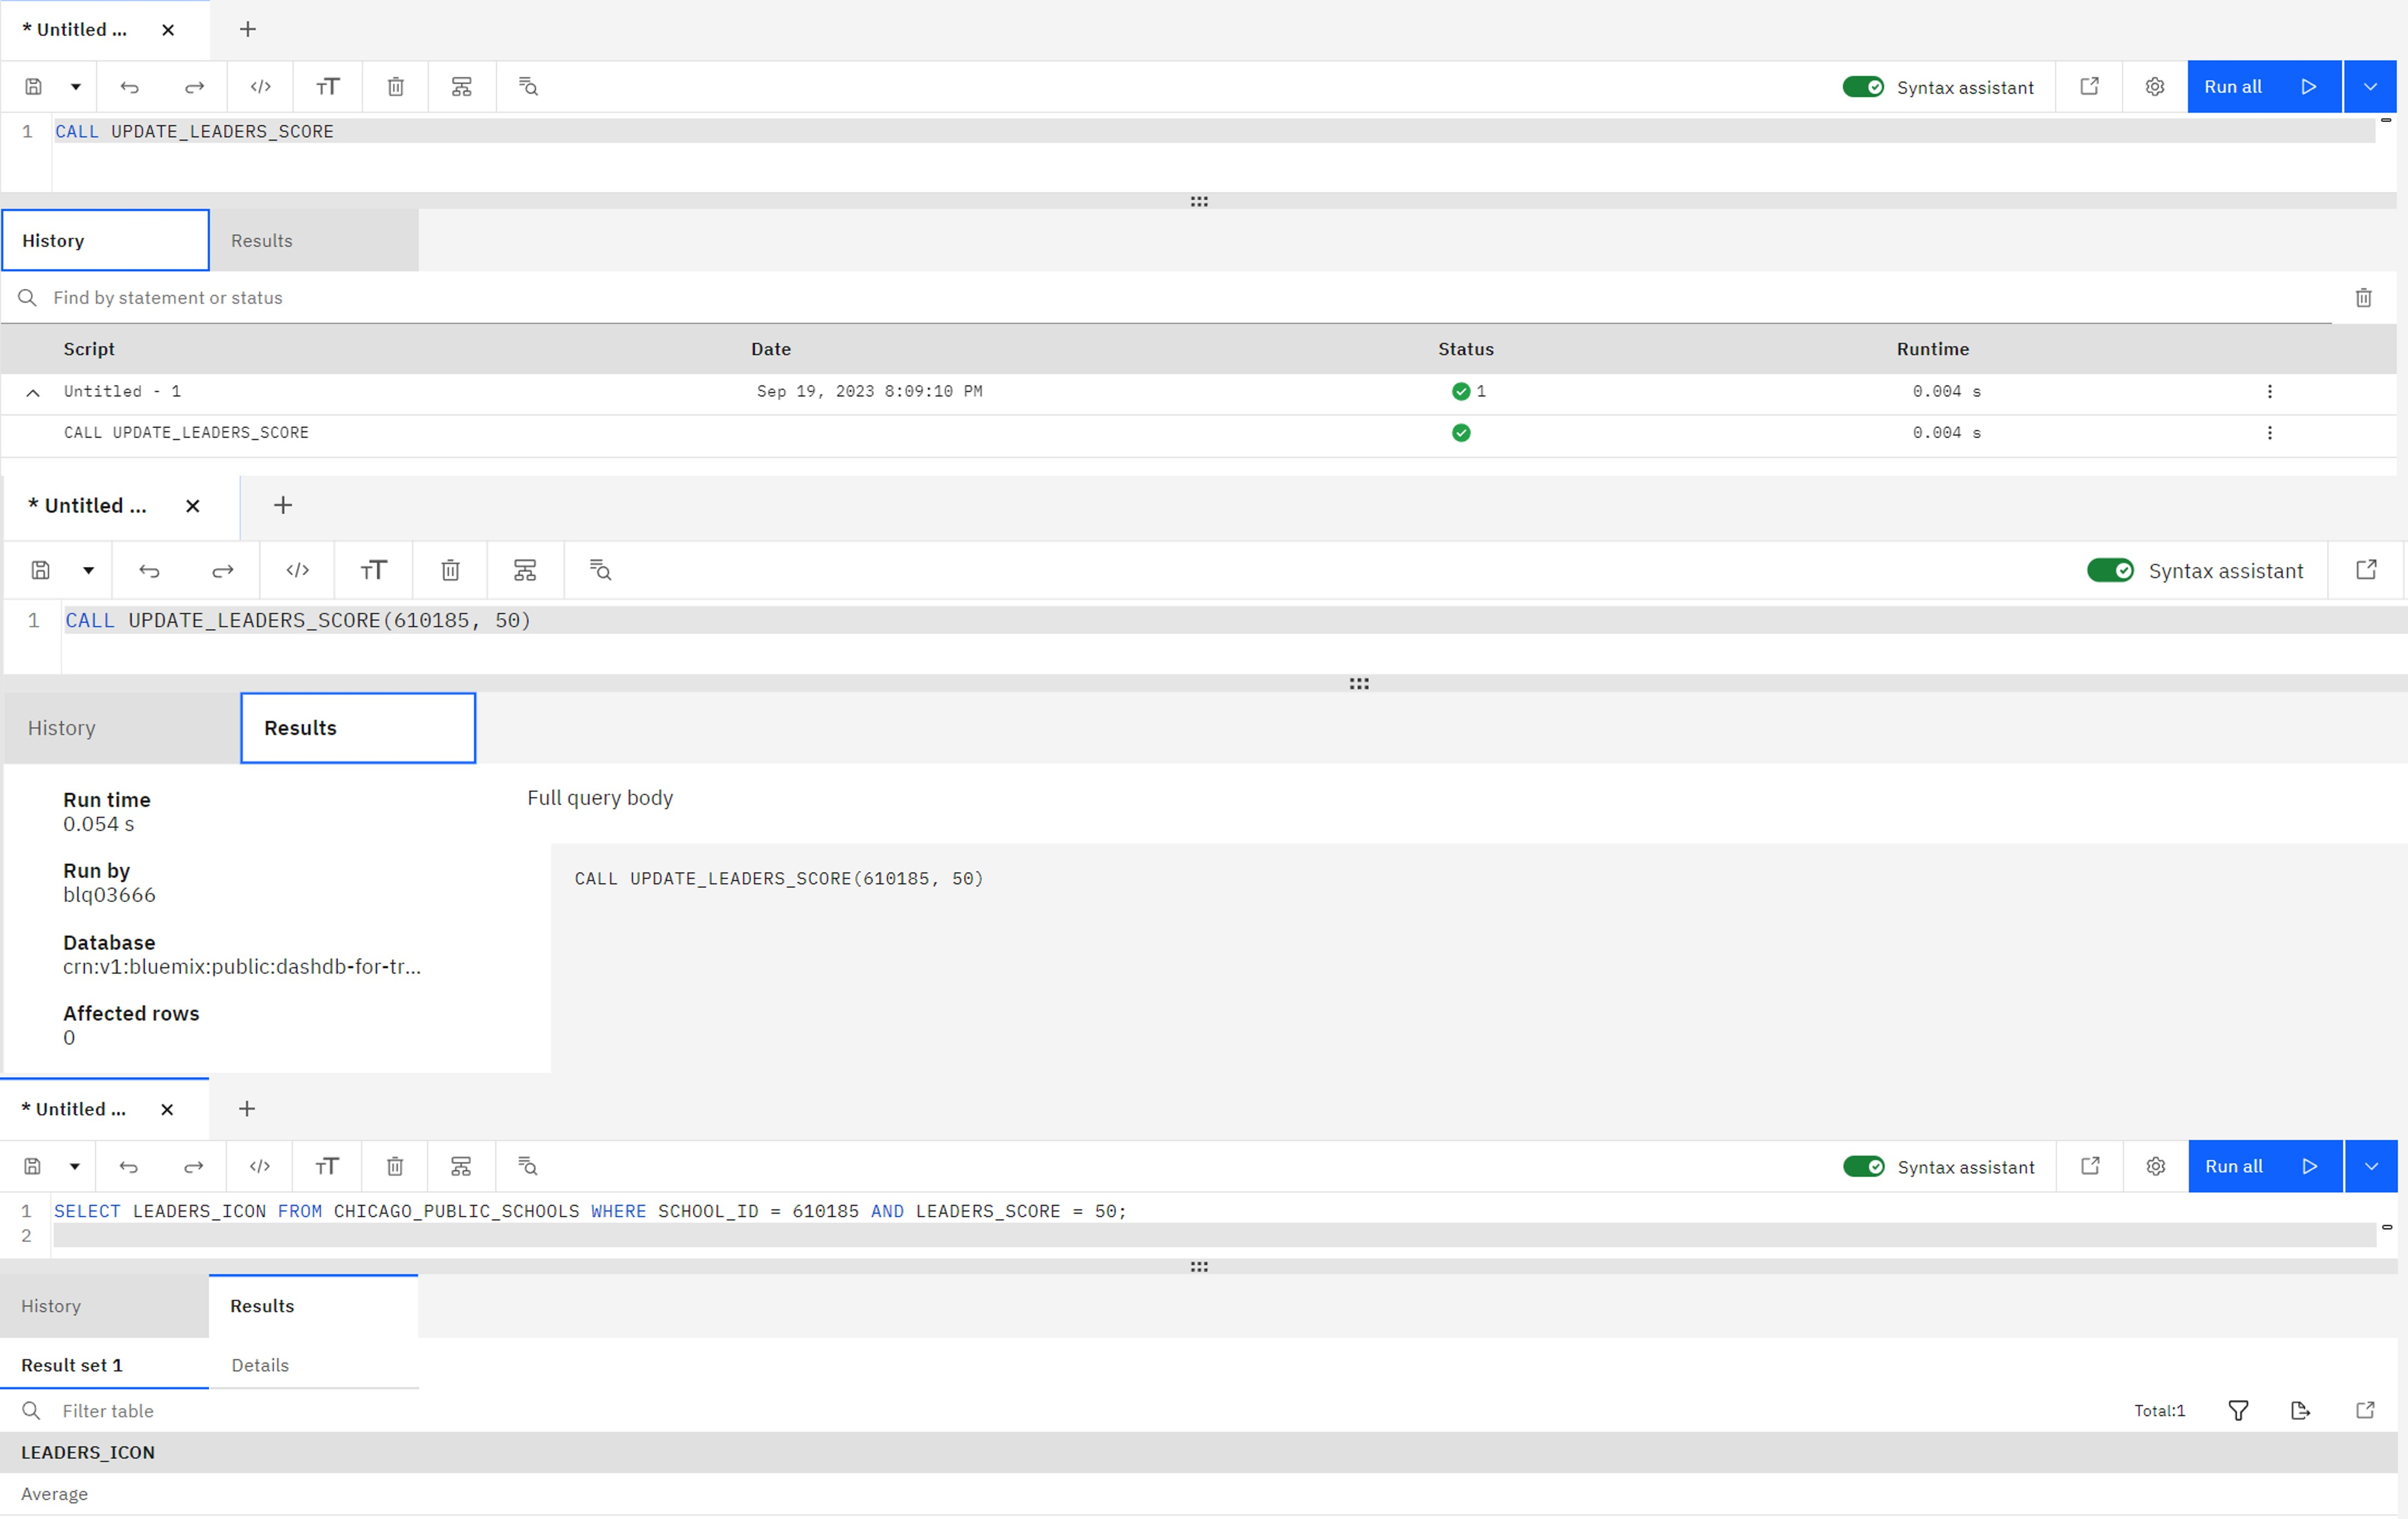

#**Exercise 4: Using Transactions**

You realise that if someone calls your code with a score outside of the allowed range (0-99), then the score will be updated with the invalid data and the icon will remain at its previous value. There are various ways to avoid this problem, one of which is using a transaction.

**Question 1:**
-  Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories.

**Take a screenshot showing the SQL query**

In [ ]:
# Excercise 4.1 solution:

--#SET TERMINATOR @
CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE(IN in_SCHOOL_ID INTEGER, IN in_LEADERS_SCORE INTEGER)
LANGUAGE SQL
MODIFIES SQL DATA
BEGIN
    UPDATE CHICAGO_PUBLIC_SCHOOLS
    SET LEADERS_SCORE = in_LEADERS_SCORE
    WHERE SCHOOL_ID = in_SCHOOL_ID;

    IF in_LEADERS_SCORE > 0 AND in_LEADERS_SCORE < 20 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Very_weak';

    ELSEIF in_LEADERS_SCORE < 40 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Weak';

    ELSEIF in_LEADERS_SCORE < 60 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Average';

    ELSEIF in_LEADERS_SCORE < 80 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Strong';

    ELSEIF in_LEADERS_SCORE < 100 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Very_strong';

    ELSE ROLLBACK WORK;
	  END IF;
END
@

**Screenshot 4.1:** The screenshot below is from IBM Db2 Cloud Console:

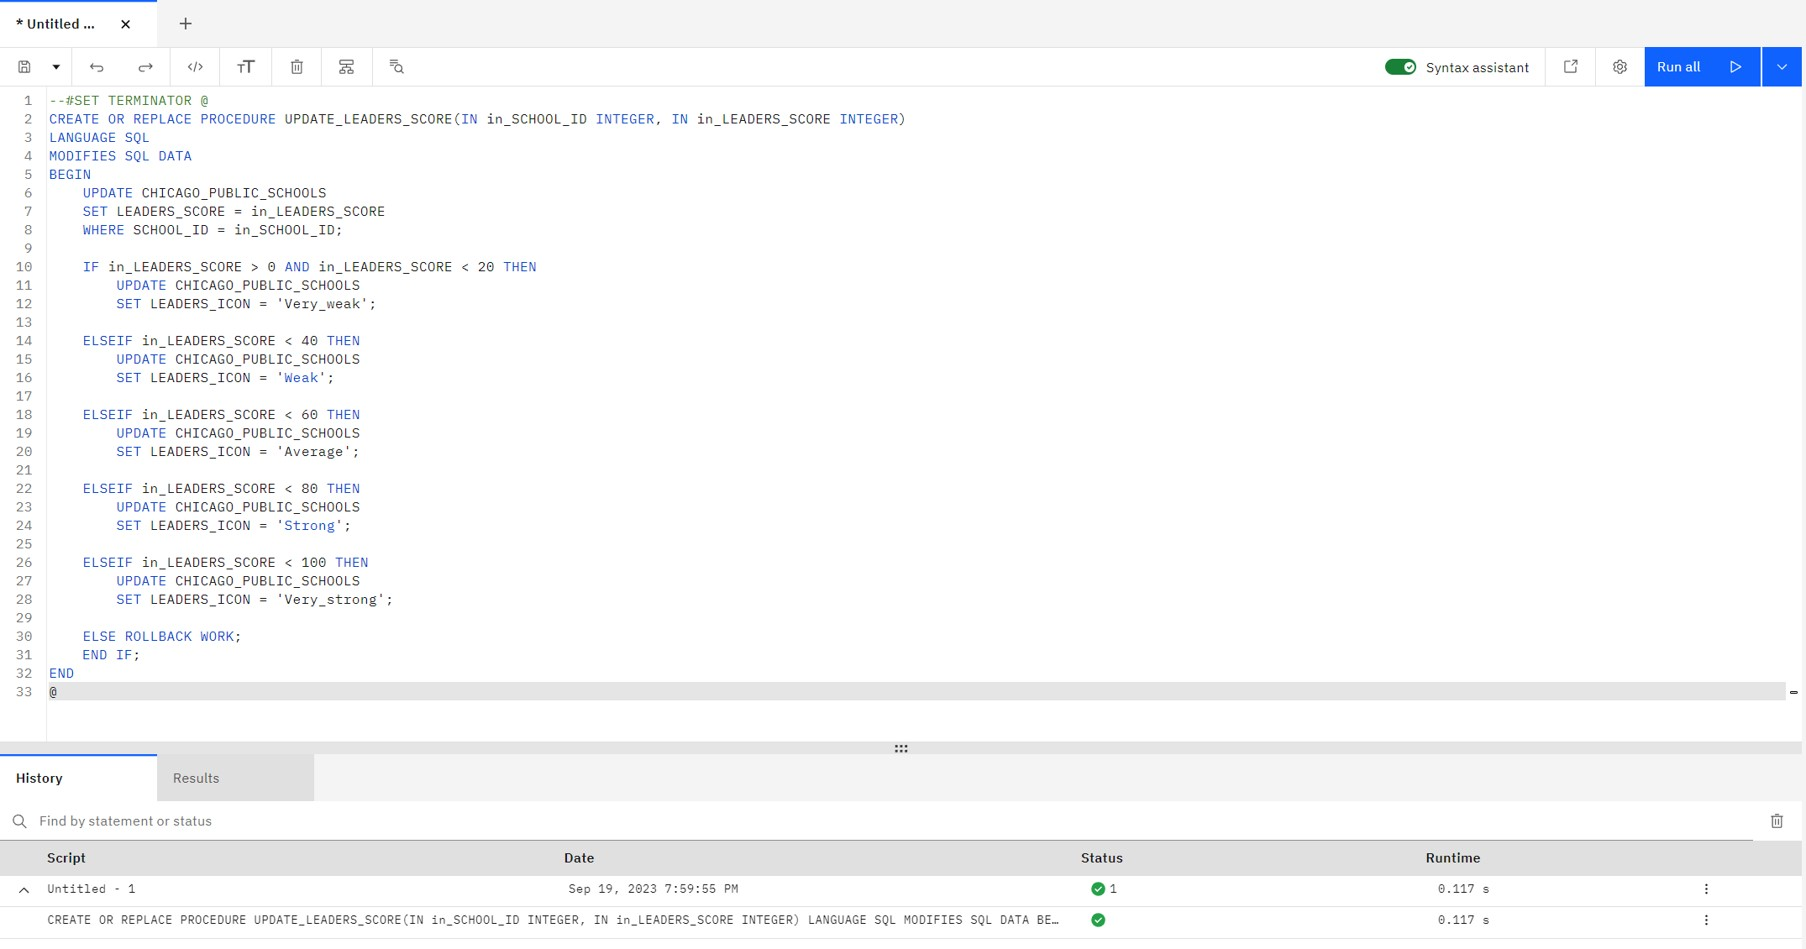

**Question 2:**
- Update your stored procedure definition again. Add a statement to commit the current unit of work at the end of the procedure.

**Take a screenshot showing the SQL query.**
- Run your code to replace the stored procedure.
- Write and run one query to check that the updated stored procedure works as expected when you use a valid score of 38.
- Write and run another query to check that the updated stored procedure works as expected when you use an invalid score of 101.

In [ ]:
# Excercise 4.2 solution:

--#SET TERMINATOR @
CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE(IN in_SCHOOL_ID INTEGER, IN in_LEADERS_SCORE INTEGER)
LANGUAGE SQL
MODIFIES SQL DATA
BEGIN
    UPDATE CHICAGO_PUBLIC_SCHOOLS
    SET LEADERS_SCORE = in_LEADERS_SCORE
    WHERE SCHOOL_ID = in_SCHOOL_ID;

    IF in_LEADERS_SCORE > 0 AND in_LEADERS_SCORE < 20 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Very_weak';

    ELSEIF in_LEADERS_SCORE < 40 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Weak';

    ELSEIF in_LEADERS_SCORE < 60 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Average';

    ELSEIF in_LEADERS_SCORE < 80 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Strong';

    ELSEIF in_LEADERS_SCORE < 100 THEN
        UPDATE CHICAGO_PUBLIC_SCHOOLS
        SET LEADERS_ICON = 'Very_strong';

    ELSE ROLLBACK WORK;
	END IF;
	COMMIT WORK;
END
@

In [ ]:
# Check that the updated stored procedure works as expected with a valid score of 38
CALL UPDATE_LEADERS_SCORE(609709, 38)

**Screenshot 4.2:** The screenshot below is from IBM Db2 Cloud Console:

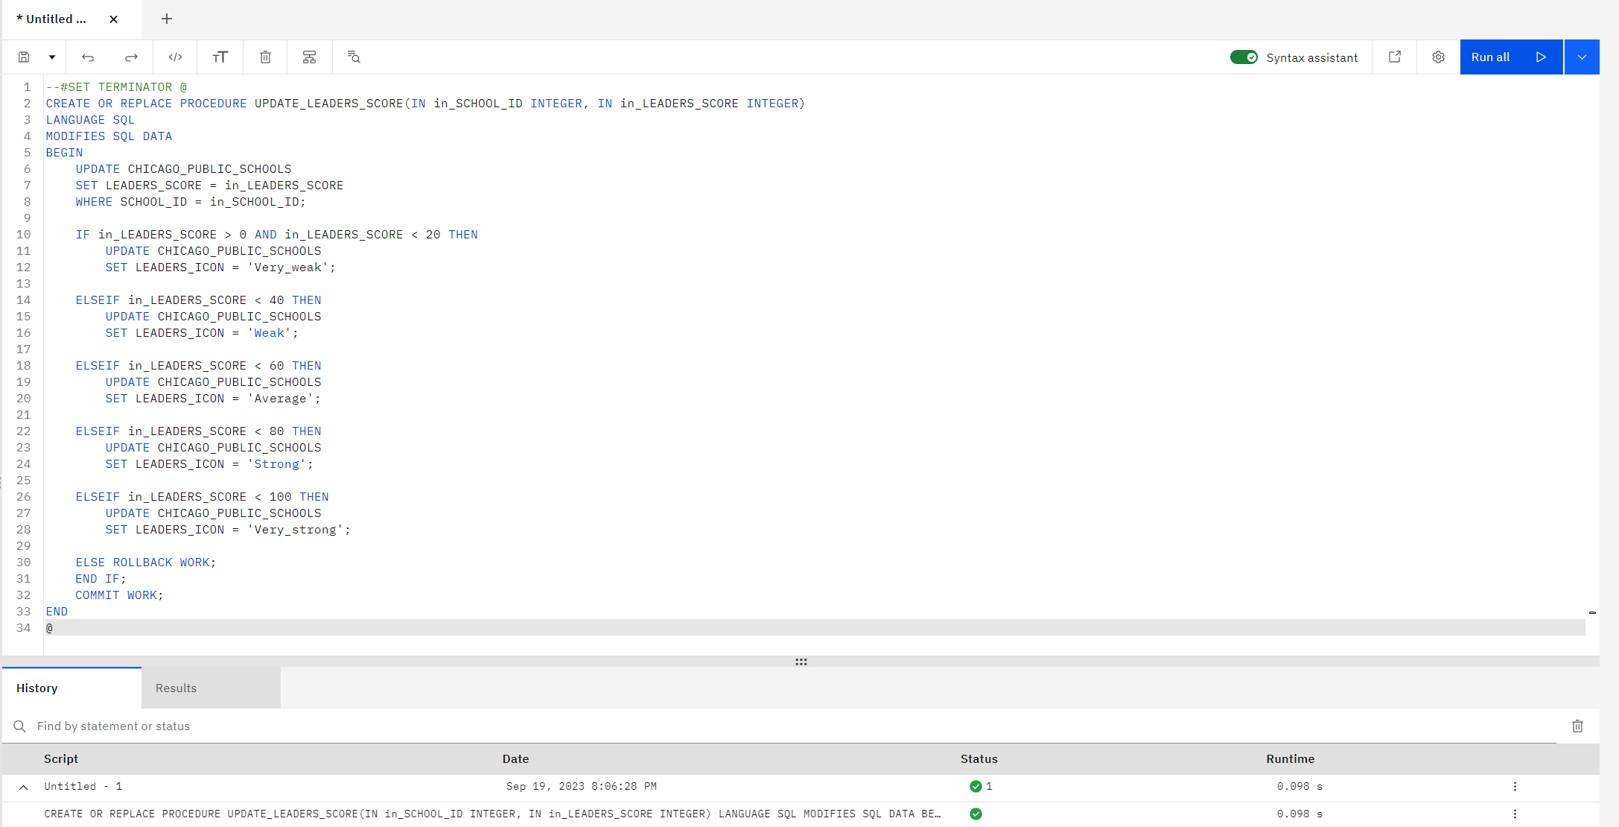

**Summary**

You can now write advanced SQL statements to query data from multiple tables, to obscure sensitive data from users, and to control how information is updated in your tables.

**Authors**

Lin Joyner

Ramesh Sannareddy

**Other Contributor**

Rose Malcolm


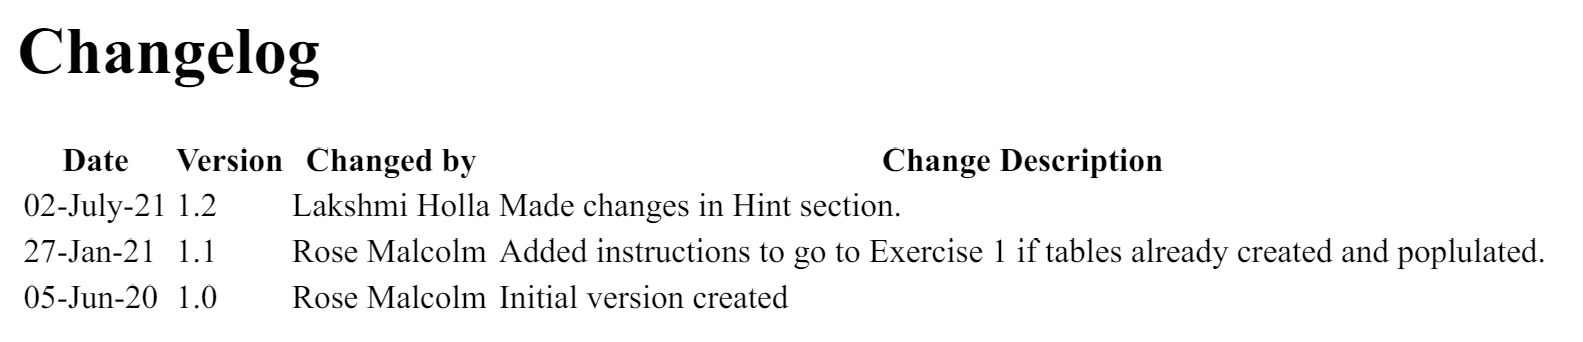

**© IBM Corporation 2020. All rights reserved.**